In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [532]:
df = pd.read_csv("Training Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [533]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [534]:
df.shape

(614, 13)

In [535]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [536]:
print(df.Dependents.unique())
print(df.Self_Employed.unique())
print(df.Loan_Amount_Term.unique())
print(df.Credit_History.unique())

['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
[ 1.  0. nan]


In [537]:
print(df.Dependents.value_counts())

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


In [538]:
df.Dependents.fillna(0, inplace=True)
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [539]:
print(df.Married.value_counts())
df.Married.fillna('Yes', inplace=True)
df.isna().sum()

Married
Yes    398
No     213
Name: count, dtype: int64


Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [540]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [541]:
average_loan_amt = df.LoanAmount.mean()
math.ceil(average_loan_amt)

147

In [542]:
df.LoanAmount.fillna(math.ceil(average_loan_amt), inplace=True)
df.isna().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [543]:
df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [544]:
def replace_Yes_No(value):
    if value=='Yes' or value=='Y':
        return 1
    else:
        return 0

To resolve Null values as in Self_Employed, we have to see how Self-Employment varies with Loan_Status

In [545]:
df.Self_Employed = df.Self_Employed.apply(replace_Yes_No)
df.Self_Employed[:5]

0    0
1    0
2    1
3    0
4    0
Name: Self_Employed, dtype: int64

In [546]:
df.Loan_Status = df.Loan_Status.apply(replace_Yes_No)
df.Loan_Status[:5]

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

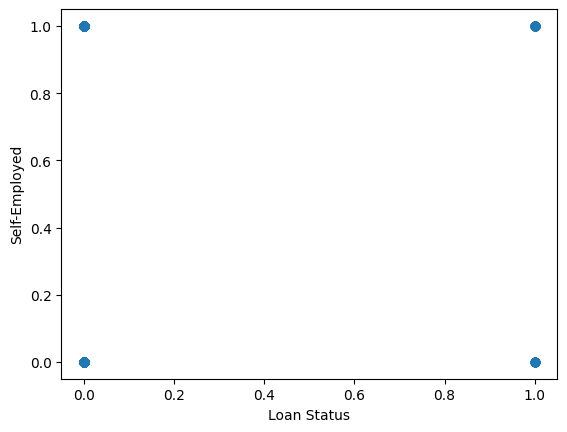

In [547]:
plt.xlabel('Loan Status')
plt.ylabel('Self-Employed')
plt.scatter(df.Self_Employed, df.Loan_Status)
plt.show()

In [548]:
self_employed_variance = df.Self_Employed - df.Loan_Status
varianced_loan = ['Heading']
loan_granted_unemployed = 0
loan_granted_employed = 0
loan_ungranted_employed = 0
loan_ungranted_unemployed = 0
for x in range(0, len(self_employed_variance)):
    if x==0: # Means self-employed = 1, Loan_Status = 1 or Self-employed = 0, Loan_Status = 0
        varianced_loan.append('Self Employed or Self Unemployed')
        loan_granted_employed+=1
        loan_ungranted_unemployed+=1
    if x==1:
        varianced_loan.append('Self Employed but Loan ungranted')
        loan_ungranted_employed+=1
    else:
        varianced_loan.append('Unemployed but Loan Granted')
        loan_granted_unemployed+=1

In [549]:
print(loan_granted_employed, loan_ungranted_unemployed)
print(loan_granted_unemployed, loan_ungranted_employed)

1 1
613 1


This means that most people who are not self-employed, were granted loans. Thus, to fill the missing values of 'Self-Employed' column, we put 0 in self employed

In [550]:
df.Self_Employed.fillna(0, inplace=True)
df.isna().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [551]:
mean_loan_term = math.ceil(df.Loan_Amount_Term.median())
mean_loan_term

360

In [552]:
df.Loan_Amount_Term.fillna(mean_loan_term, inplace=True)
df.isna().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [553]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [554]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [555]:
df[df.Credit_History==0].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
17,LP001036,Female,No,0,Graduate,0,3510,0.0,76.0,360.0,0.0,Urban,0
20,LP001043,Male,Yes,0,Not Graduate,0,7660,0.0,104.0,360.0,0.0,Urban,0
22,LP001047,Male,Yes,0,Not Graduate,0,2600,1911.0,116.0,360.0,0.0,Semiurban,0
23,LP001050,NaN,Yes,2,Not Graduate,0,3365,1917.0,112.0,360.0,0.0,Rural,0


This means, people who have mostly taken credit before, have much more chances of getting loans. So we can write a function such that we can randomly assign 0's and 1's to these 50 missing values

In [556]:
import random
def modify_Credit_History(value):
    if value==1:
        return 1
    if value==0:
        return 0
    if pd.isna(value):
        return random.randint(0,1)

In [557]:
df.Credit_History = df.Credit_History.apply(modify_Credit_History)
df.Credit_History.value_counts()

Credit_History
1    501
0    113
Name: count, dtype: int64

In [558]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now we sort out the Gender column

In [559]:
df_male = df[df.Gender=='Male']
df_female = df[df.Gender=='Female']

In [560]:
df_male.Loan_Status.value_counts()

Loan_Status
1    339
0    150
Name: count, dtype: int64

In [561]:
df_female.Loan_Status.value_counts()

Loan_Status
1    75
0    37
Name: count, dtype: int64

So in general, Males have taken more loans. Since the number of missing values is 13, we can easily ignore gender bias and fill the 13 data points as 'male'

In [562]:
df.Gender.fillna('Male', inplace=True)
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# All NULL values have been handled now

In [563]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,0,5849,0.0,147.0,360.0,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,0,4583,1508.0,128.0,360.0,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,1,3000,0.0,66.0,360.0,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,0,2583,2358.0,120.0,360.0,1,Urban,1
4,LP001008,Male,No,0,Graduate,0,6000,0.0,141.0,360.0,1,Urban,1


In [564]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status            int64
dtype: object

In [565]:
def change_dependencies(value):
    if value=='0' or value==0:
        return 'Zero'
    if value=='1':
        return 'One'
    if value=='2':
        return 'Two'
    if value=='3+':
        return 'More'

In [566]:
df.Dependents = df.Dependents.apply(change_dependencies)
df.Dependents[:10]

0    Zero
1     One
2    Zero
3    Zero
4    Zero
5     Two
6    Zero
7    More
8     Two
9     One
Name: Dependents, dtype: object

Let us label encode the object columns

In [567]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.Gender = encoder.fit_transform(df.Gender)
df.Married = encoder.fit_transform(df.Married)
df.Dependents = encoder.fit_transform(df.Dependents)
df.Education = encoder.fit_transform(df.Education)
df.Property_Area = encoder.fit_transform(df.Property_Area)

In [568]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,3,0,0,5849,0.0,147.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,3,0,1,3000,0.0,66.0,360.0,1,2,1


We do not need Loan_ID.
Our target column is Loan_Status.

In [569]:
df = df.drop('Loan_ID', axis='columns')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,3,0,0,5849,0.0,147.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,3,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,3,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,3,0,0,6000,0.0,141.0,360.0,1,2,1


In [570]:
df.Dependents.unique()

array([3, 1, 2, 0])

In [571]:
X = df.drop('Loan_Status', axis='columns')
Y = df.Loan_Status

In [572]:
df_test = pd.read_csv("Test Dataset.csv")
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [573]:
df_test.shape

(367, 12)

Since it is the Test Dataset, we don't have to care about missing values. We can just drop the null valued data points

In [574]:
df_test.dropna(inplace=True)

In [575]:
df_test.shape

(289, 12)

In [576]:
df.shape

(614, 12)

In [577]:
X_test = df_test

In [578]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,3,0,0,5849,0.0,147.0,360.0,1,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0
2,1,1,3,0,1,3000,0.0,66.0,360.0,1,2
3,1,1,3,1,0,2583,2358.0,120.0,360.0,1,2
4,1,0,3,0,0,6000,0.0,141.0,360.0,1,2


In [579]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(X)

In [580]:
x_train_scaled[:2]

array([[ 0.47234264, -1.37208932,  0.7385291 , -0.52836225, -0.39260074,
         0.07299082, -0.55448733,  0.00674981,  0.2732313 ,  0.47491989,
         1.22329839],
       [ 0.47234264,  0.72881553, -1.2416319 , -0.52836225, -0.39260074,
        -0.13441195, -0.03873155, -0.21952397,  0.2732313 ,  0.47491989,
        -1.31851281]])

In [581]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_scaled, Y, train_size=0.95, random_state=42)
print(len(x_train), len(x_val))

583 31


In [582]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [583]:
model1 = LogisticRegression(C=1.0, fit_intercept=True, max_iter=1000)
model1.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Score using Logistic Regression

In [584]:
model1.score(x_val, y_val)

0.8709677419354839

In [585]:
model2 = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
model2.fit(x_train, y_train)

SVC(gamma='auto')

Score using Support Vector Classifier

In [586]:
model2.score(x_val, y_val)

0.8709677419354839

Score using Random Forest Classifier

In [587]:
model3 = RandomForestClassifier(n_estimators=40, criterion='gini', max_depth=10, min_samples_split=2)
model3.fit(x_train, y_train)
model3.score(x_val, y_val)

0.8387096774193549

In [588]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [589]:
df_test.Dependents = df_test.Dependents.apply(change_dependencies)
df_test.Credit_History = df_test.Credit_History.apply(modify_Credit_History)

In [592]:
df_test.Gender = encoder.fit_transform(df_test.Gender)
df_test.Married = encoder.fit_transform(df_test.Married)
df_test.Dependents = encoder.fit_transform(df_test.Dependents)
df_test.Education = encoder.fit_transform(df_test.Education)
df_test.Property_Area = encoder.fit_transform(df_test.Property_Area)
df_test.Self_Employed = encoder.fit_transform(df_test.Self_Employed)

In [593]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,3,0,0,5720,0,110.0,360.0,1,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1,2
4,LP001051,1,0,3,1,0,3276,0,78.0,360.0,1,2
5,LP001054,1,1,3,1,1,2165,3422,152.0,360.0,1,2


This is now the modified TEST DATASET. Now we run the predictions on it

In [595]:
df_test = df_test.drop("Loan_ID", axis='columns')

In [596]:
df_test = scalar.fit_transform(df_test)

In [597]:
predic1 = model1.predict(df_test)
predic2 = model2.predict(df_test)
predic3 = model3.predict(df_test)

In [599]:
from sklearn.metrics import classification_report, confusion_matrix

In [600]:
pred1 = model1.predict(x_val)
pred2 = model2.predict(x_val)
pred3 = model3.predict(x_val)

Results of Predictions

In [601]:
print(classification_report(y_val, pred1))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.90      0.96      0.93        27

    accuracy                           0.87        31
   macro avg       0.70      0.61      0.63        31
weighted avg       0.85      0.87      0.85        31



In [602]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.89      0.93      0.91        27

    accuracy                           0.84        31
   macro avg       0.61      0.59      0.60        31
weighted avg       0.82      0.84      0.83        31



Now we plot the confusion matrices

<Axes: >

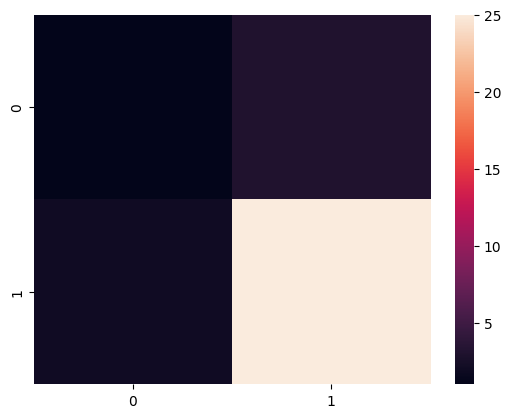

In [606]:
cm = confusion_matrix(y_val, pred3)
sns.heatmap(cm)

In [608]:
print(cm)

[[ 1  3]
 [ 2 25]]


<Axes: >

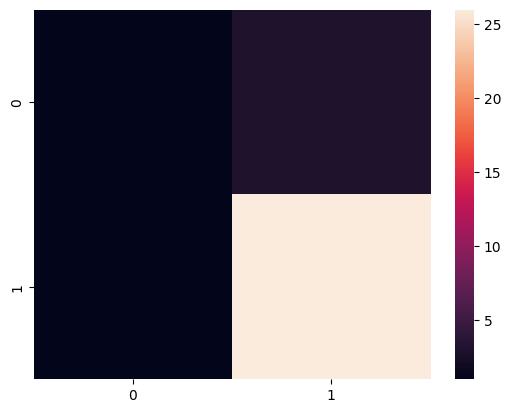

In [607]:
cm2 = confusion_matrix(y_val, pred1)
sns.heatmap(cm2)

In [609]:
print(cm2)

[[ 1  3]
 [ 1 26]]
